# I. The Hadamard Test

In [2]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

## How qubits work

Quantum bits, or more commonly Qubits, are paricles used for computation on a Quantum computer. Qubits are quite different from classical bits because superposition (which will be explained later on) which causes them to require very different setup and circuits to preform calculations.

Similarly to classical bits, qubits have "two" values different values, or more explicilty states, that the Quantum Computer can read. These states are equivent (as close as you can get to) to the classical 0 and 1. One state is spin up and the other is spin down, which we deem $|0\rangle$ (pronounced ket 0) and $|1\rangle$ (pronounced ket 1) respectively. (It is standard practice to write qubit states in dirac notation.)

These states represent a orthnormal basis (they are of unit length and orthogonal to eachother). This basis is called the Z-Basis (see single qubit gates below for more information).

Below $|0\rangle$ represents a qubit with spin up, and $|1\rangle$ represents a qubit with spin down.


$$|0\rangle =  \begin{pmatrix}1\\0\end{pmatrix}$$

$$|1\rangle =  \begin{pmatrix}0\\1\end{pmatrix}$$

### Superposition
Superposition is the idea that something can be in combination states at the same time.
Since qubits are in a Quantum Computer are in an enviroment with very little outside forces/particles, we can put particles into a superposition of the states.
An example of a superposition state of $|0\rangle$ and $|1\rangle$ is the $|+\rangle$ state.

$$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\1\end{pmatrix}$$

States like the $|+\rangle$ give qubits an advantage over classical bits, allowing a lot more complex calculations in way smaller steps, which allows a Quantum Computer to be able to contruct algorthims that are way faster than a classical computer.

### Bloch Sphere
A common technique for visualizing superposition states is the bloch sphere. The state shown below is $|0\rangle$.

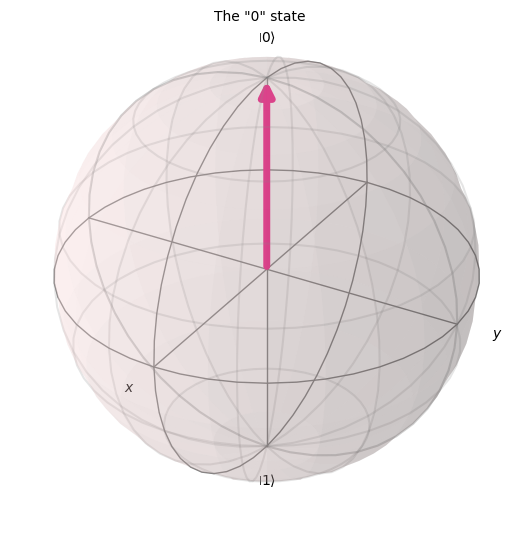

In [10]:
plot_bloch_vector([0,0,1], title='The 0 state')

### Measurement
But, you might be asking, what would happen if we were to measure a particle in superposition. Well when a particle that is put into superposition is measured it collapses in to one of the states it is in a combination of. For example if we were to take the $|+\rangle$ state above and tried to measure it sometimes we would get 0 and other times we would get 1 with certain probabilities. To calculate these probabilities we first need to find the coeffiecent in front of the state we want to measure. We can do a inner product of the hermitian (also called dagger operation) of the state you want to measure with the current state of the particle. To find the Hermition of a state you take the conjugate transpose of your state. The Hermition of a generic state can be written in dirac notation as $\langle \Psi|$ (pronounced bra Psi).

For example, lets say I wanted to see what fraction of the time I will measure $|0\rangle$ from the $|+\rangle$ state. (Since $|0\rangle$ and $|1\rangle$ form a basis for the states of the qubits, the inner product of two of the same states will be 1, and the inner product of two different states will be 0.)

One calculation with only diract notation
$$\langle 0|+\rangle = \langle 0|\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) = \frac{1}{\sqrt{2}}(\langle 0|0\rangle + \langle 0|1\rangle) = \frac{1}{\sqrt{2}} (1 + 0) = \frac{1}{\sqrt{2}}$$

One with Linear Algebra
$$\langle 0|+\rangle = \begin{pmatrix}1&0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \frac{1}{\sqrt{2}}(1 + 0) = \frac{1}{\sqrt{2}}$$

This coeffient that we get out of the inner product we do can possibly be complex which wouldn't make physical sense for a probability, so we multiply the coeffient by its complex conjugate to find the actual probability.

$$\mathbb{P}(|0\rangle) = ||\langle 0|+\rangle|| = \langle 0|+\rangle \overline{\langle 0|+\rangle} = \frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}} = \frac{1}{2}$$

This means that 50% of the time we will measure $|0\rangle$ from $|+\rangle$. <b> For any state $|\Psi\rangle$ the probability of getting $|0\rangle$ plus the probability of getting $|1\rangle$ must be equal to 1 </b>, because putting a particle into superposition doesn't create or destroy parts of the particle. 

Since to find a probability of a particle being in a state always requires us to multiply it by its complex conjugate, there can be states that are equivent to eachother even though they have different constants in front of them when measured in a certain basis. For example, $e^{\pi/4}|0\rangle \equiv |0\rangle$ in the Z-Basis. This means that $e^{\pi/4}|0\rangle$ and $|0\rangle$ have a different global phase, but when measuring them there will be no distinction. <b>Global Phase doesn't affect the probabilities of measurement.</b>

## Single Qubit Gates
To preform calculation on qubits we need to setup the qubits to be in the correct states before we have them interact with eachother. States that are eigenvector

### X-gate
The x gate is a bit flip, which is a 180 degree rotation around the x-axis on the bloch sphere.
$$X = \begin{pmatrix}0&1\\1&0\end{pmatrix}$$
$$X|0\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = |1\rangle$$
$$X|1\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$$
The X-Basis is $|+\rangle$ and $|-\rangle$ (since they are eigenvectors of the X-gate)

### Z-gate
The Z gate is a phase-flip, which is a 180 degree rotation around the z-axis on the bloch sphere.
$$Z = \begin{pmatrix}1&0\\0&-1\end{pmatrix}$$
$$Z|0\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$$
$$Z|1\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\-1\end{pmatrix} = -|1\rangle$$
The Z-Basis is $|0\rangle$ and $|1\rangle$ (since they are eigenvectors of the Z-gate) 

### Y-gate
The Y gate is a phase-flip and a bit flip, which is a 180 degree rotation around the y-axis on the bloch sphere.
$$Y = \begin{pmatrix}0&-i\\i&0\end{pmatrix}$$
$$Y|0\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\i\end{pmatrix} = i|1\rangle$$
$$Y|1\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}-i\\0\end{pmatrix} = -i|0\rangle$$
The Z-Basis is $|i\rangle$ and $|-i\rangle$ (since they are eigenvectors of the Z-gate) (also written explicity out below)

$$|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\i\end{pmatrix}$$
$$|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-i\end{pmatrix}$$


## Control Gates
Control Gates are gates that change one qubit based off of the state of another. To determine what they will look like as matrices we must first discuss how to tensor products.
### Tensor Products
Tensor products are a way to linearly combine different objects to represent independent combinations of them. For example say we wanted to figure out how to represent the state $|0\rangle|1\rangle$ as a vector.
$$ |0\rangle|1\rangle = \begin{pmatrix}1\\0\end{pmatrix} \otimes \begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}1 \begin{pmatrix}0\\1\end{pmatrix} \\0 \begin{pmatrix}0\\1\end{pmatrix} \end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} $$

Another example is suppose we have a circuit shown below and we want to represent what will happen to the qubits agter they go throught the circuit.

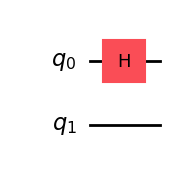

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl')

We can do this via a tensor product with $H \otimes I$
$$H \otimes I = \frac{1}{\sqrt{2}} \begin{pmatrix}1&1\\1&-1\end{pmatrix} \otimes \begin{pmatrix}1&0\\0&1\end{pmatrix} =
\frac{1}{\sqrt{2}} \begin{pmatrix}1 \begin{pmatrix}1&0\\0&1\end{pmatrix}&1 \begin{pmatrix}1&0\\0&1\end{pmatrix}\\1 \begin{pmatrix}1&0\\0&1\end{pmatrix}&-1 \begin{pmatrix}1&0\\0&1\end{pmatrix}\end{pmatrix} =  \begin{pmatrix}1&0&1&0\\0&1&0&1\\1&0&-1&0\\0&1&0&-1\end{pmatrix}$$

Now we can plug in any initial state we want to find the final state.

### $CNOT_{01}$-Gate
One controlled gate is the $CNOT_{01}$ gate (can also be written as $CX_{01}$). The first number of the subscript is the target qubit's number and the second number is the control qubit's number.
$$CNOT_{01}|00\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = |00\rangle$$
$$CNOT_{01}|01\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\1\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = |01\rangle$$
$$CNOT_{01}|10\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} = |11\rangle$$
$$CNOT_{01}|11\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\0\\1\end{pmatrix} = \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = |10\rangle$$

## Eigenvalues and Eigenvectors
Something that is somewhat important to understand is Eigenvalues and Eigenvectors since every qubit gate can be represented as matrix. Eigenvalues and Eigenvector solve the below equation. ($\lambda$ represents the eigenvalue and $|\Psi\rangle$ represents the eigenvector.)
$$U|\Psi\rangle = \lambda|\Psi\rangle$$

This equations effectively says that a Gate operating on one of its eigenvectors is equivent to that eigenvector times its eigenvalue. Something interesting you can do with eigenvalues and eigenvectors is decompose a matrix into a couple of more mangeable matricies. This decomposition is called spectral decomposition. (A small derivation is shown below.)
$$U|\Psi\rangle = \lambda|\Psi\rangle \implies U\Psi = \Psi\Lambda \implies U = \Psi\Lambda\Psi^{-1} \implies U = \Psi\Lambda\Psi^{T}$$
Where $\Lambda = I|\lambda\rangle$ (with $|\lambda\rangle$ representing all the eigenvalues put into a vector) and $\Psi$ representing a matrix of all the eigenvectors as columns (arranged in similar ordering to the $\Lambda$ matrix). The final step of the derivation is only allowed if each eigenvector is normalized (aka $\langle \psi | \psi \rangle = 1$)

## Hadmard Gate

If we represent the $|0\rangle$ and $|1\rangle$ states as vectors, we can see that the state $|0\rangle = \begin{pmatrix}1\\0\end{pmatrix}$ showing a $100\%$ chance of measuring $0$ with a $0\%$ chance of measuring 1 and the state $|1\rangle = \begin{pmatrix}0\\1\end{pmatrix}$ showing a $100\%$ probability of measuring $1$ and $0\%$ of measuring $0$. If we do the same with the Hadamard gate we see that $H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$ thus effectively transforming any state into superposition.

Let's look at the affect of applying a Hadamard gate to a state $|0\rangle$:

$$|0\rangle  = \begin{pmatrix}1\\0\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$

$$\xrightarrow{H} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix}$$

Moving back into dirac notation we can see the affect of applying the Hadamard gate to the $|0\rangle$ state gives:

$$\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$$

This shows how the Hadmard gate can turn the $|0\rangle$ state into the "plus state" superposition where the magnitude of the probability of measuring $1$ or $0$ is the same and they are both positive. Looking at the affect of the same gate on the $|1\rangle$ state:

$$|1\rangle  = \begin{pmatrix}0\\1\end{pmatrix} \qquad \qquad H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$
$$\xrightarrow{H} \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix}$$

Again, returning to dirac notation we see that this becomes:

$$\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$$

The gate again transforms the state into superposition but this time brings it to the "minus state" where the magnitude of the probabilities are still the same but they are now a difference instead of a sum. Note that the total probability of each superposition is still $1$:

$$\sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(\frac{1}{\sqrt{2}}\right)^{2}} = 1 \qquad \qquad \sqrt{\left(\frac{1}{\sqrt{2}}\right)^{2} + \left(-\frac{1}{\sqrt{2}}\right)^{2}} = 1$$

In [6]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

## Quantum Phase Estimation (QPE): The Problem Setup

The goal of quantum phase estimation is to estimate the eigenvalues and therefore the phase of a known unitary operator $U$ given a state $|\psi\rangle$, the eigenvector of the eigenvalue $\lambda$ of $U$. Phase estimation is often a "sub-problem" where we use the quantum phase estimation procedure as a "sub-routine" in some larger more classically applicable problem. 

Suppose that $U$ is an $n\times n$ unitary matrix. All unitary matrices are normal, thus there exists an ortho-normal basis of vectors $\left\{|\psi_1\rangle,\dots,|\psi_N\rangle\right\}$ and complex numbers $\lambda_1 = e^{i\theta_1}, \dots, \lambda_N = e^{i\theta_N}$ where $0\leq \theta_N \leq 2\pi$ such that 

$$U = \sum_{k=1}^{N}\lambda_k|\psi_k\rangle\langle\psi_k|$$

This is called the spectral decomposition of $U$. Since we know each vector $|\psi_k\rangle$ is part of an ortho-normal basis of eigenvectors, we can say that each vector $|\psi_k\rangle$ is an eigenvector of $U$ having eigenvalue $\lambda_k$:

$$U|\psi_k\rangle = \lambda_k|\psi_k\rangle = e^{i\theta_k}|\psi_k\rangle, \quad 0\leq \theta_k \leq 2\pi$$

It is important to note that this is not neccessarily how $U$ works for an arbitrary vector. But because we know there is an ortho-normal basis of eigenvectors, if $U$ is multiplied to any $|\psi_k\rangle$, using the ortho-normality of the vectors we are left with all terms being $0$ except for the final $\lambda_k$ giving us the equation above.

The eigenvalue $\lambda_k$ is also often written as $\lambda_k = e^{i2\pi\varphi_k}$ where $0\leq \varphi_k \leq 1$. We are given a unitary operator $U$, and $|\psi\rangle$ and eigenvector of $U$. We can now set up the phase estimation problem as follows:

$$U|\psi\rangle = e^{i2\pi\varphi}|\psi\rangle, \quad \varphi \in [0,1)$$

We can think of this exponent "$i2\pi\varphi$" as the location of a point around the complex unit circle. The real number $\varphi$ is effectively rotating this point up to $i2\pi \text{ rad}$ as $\varphi$ goes from $0$ to $1$. Ensuring we are including $0$ and not $1$ for the range of $\varphi$ guarantees that we can represent every point on the complex unit circle with a unique value of $\varphi$. This is because $i0$ and $i2\pi\text{ rad}$ are the same position on the complex unit circle.

## Hadamard Test

The simplest way to estimate $\varphi$ with a quantum computer is to use the Hadamard test. This test is a very useful tool for estimating the expectation value of a unitary operator with respect to some state, i.e., $\langle \psi|U|\psi\rangle$. Our unitary operator $U$ is not generally a hermitian matrix meaning its eigenvalues can be complex and not just real. Therefore this does not correspond to the measurement of a physical observable. To this end, it is necessary that we measure the real and imaginary part of the expectation value seperately.

In order to obtain $\langle \psi|U|\psi\rangle$, we will first use the real Hadamard test to find $\text{Re}\langle \psi|U|\psi\rangle$. We will choose a value of $\varphi = 0.5625$ to estimate.

In [45]:
angle = 0.5625 #Exact value of phi to estimate

In [66]:
def re_circuit(theta):
    circuit = QuantumCircuit(2,1) #Create circuit with 2 qubits and 1 classical bit
    circuit.x(1) #Apply pauli-x gate to q1 to put it to 1 state
    circuit.barrier(label='$\pi_0$')    
    circuit.h(0) #Apply hadamard gate to q0 to put it into + state
    circuit.barrier(label='$\pi_1$') 
    circuit.cp(theta,0,1) # rotates q0 2*pi*theta radians if q1 is 1
    circuit.barrier(label='$\pi_2$') 
    circuit.h(0) #Apply second hadamard gate to q0 to ensure the value phi affects our output
    circuit.barrier(label='$\pi_3$')
    circuit.measure(0,0) #Measure q0
    return circuit

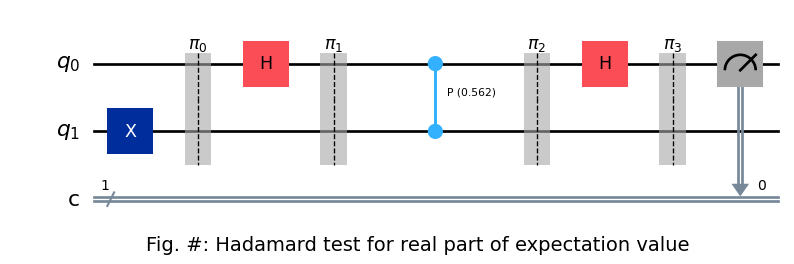

In [69]:
qc = re_circuit(angle)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.text(0, -2.75, 'Fig. #: Hadamard test for real part of expectation value', size=14)

qc.draw('mpl', ax=ax)

Let's walk through each step of the general Hadamard test to ensure we are getting what we expect.

The intial state of our circuit can be represented as

$$|\pi_0\rangle = |0\rangle|\psi\rangle = \begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle$$

We then apply the Hadamard gate to the control qubit transforming it to the $+$ state

$$|\pi_1\rangle = H|0\rangle|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} (1\cdot 1) + (1\cdot 0) \\(1\cdot 1) + (-1\cdot 0) \end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle|\psi\rangle + \frac{1}{\sqrt{2}}|1\rangle|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|\psi\rangle = |+\rangle|\psi\rangle$$

Next the controlled-unitary operator is performed resulting in the following state

$$|\pi_2\rangle = |+\rangle U|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle|\psi\rangle + \frac{1}{\sqrt{2}} |1\rangle U|\psi\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 0\\0 & e^{i\theta}\end{pmatrix}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} (1\cdot 1) + (0\cdot 1) \\ (0\cdot 1) + (1\cdot e^{i\theta})\end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\ e^{i\theta}\end{pmatrix}|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + e^{i\theta}|1\rangle \right)|\psi\rangle$$

Finally, we apply the second Hadamard gate to the circuit leaving us with the state

$$|\pi_3\rangle = H\frac{1}{\sqrt{2}}\left(|0\rangle + e^{i\theta}|1\rangle \right)|\psi\rangle = \frac{1}{2}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix} 1\\ e^{i\theta}\end{pmatrix}|\psi\rangle = \frac{1}{2}\begin{pmatrix} (1\cdot 1) + (1\cdot e^{i\theta}) \\(1\cdot 1) + (-1\cdot e^{i\theta})\end{pmatrix}|\psi\rangle = \frac{1}{2}\begin{pmatrix} 1 + e^{i\theta} \\1 - e^{i\theta}\end{pmatrix}|\psi\rangle = \left(\frac{1+e^{i\theta}}{2}|0\rangle + \frac{1-e^{i\theta}}{2}|1\rangle\right)|\psi\rangle$$

For simplicity in calculating the probabilities, this can also be represented as 
$$|0\rangle\frac{I+U}{2}|\psi\rangle + |1\rangle\frac{I-U}{2}|\psi\rangle$$

Since we know the probability of a quantum state comes from the square magnitude of the probability amplitude, we can find just that. We will first look at the probability of measuring the qubit $0$ to be in the $|0\rangle$ state.

$$p_0(|0\rangle) = \left||0\rangle\frac{I+U}{2}|\psi\rangle\right|^2 = ||0\rangle|^2 \left|\frac{I+U}{2}|\psi\rangle\right|^2 = \frac{\langle \psi|(I+U^{\dagger})(I+U)|\psi\rangle}{4} = \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}$$

If we now take a similar process for the probability of measuring qubit $0$ to be in the $|1\rangle$ state, we get the following

$$p_0(|1\rangle) = \left||0\rangle\frac{I-U}{2}|\psi\rangle\right|^2 = ||0\rangle|^2 \left|\frac{I-U}{2}|\psi\rangle\right|^2 = \frac{\langle \psi|(I-U^{\dagger})(I-U)|\psi\rangle}{4} = \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}$$

If we subtract these two probabilities, we should be left with the real part of the expectation value $\text{Re}\langle\psi|U|\psi\rangle$

$$p_0(|0\rangle) - p_0(|1\rangle) = \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} - \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} = \frac{\langle \psi|(U+U^{\dagger})|\psi\rangle}{2}$$

Recall that for a unitary operator $U$, $\langle\alpha|U|\beta\rangle = \langle\beta|U^{\dagger}|\alpha\rangle^*$. Therefore if $\alpha = \beta$ such as in our case, $\langle\psi|U|\psi\rangle = \langle\psi|U^{\dagger}|\psi\rangle^*$. Applying this and the fact that $x + x^* = 2\text{Re}(x)$ to our previous equation, we get the following

$$\frac{\langle \psi|(U+U^{\dagger})|\psi\rangle}{2} = \frac{\langle \psi|U|\psi\rangle + \langle \psi|U|\psi\rangle^*}{2} = \frac{2\text{Re}\langle\psi|U|\psi\rangle}{2} = \text{Re}\langle\psi|U|\psi\rangle$$

We can similarly find the real expectation value $\text{Re}\langle\psi|U|\psi\rangle$ directly from either of the probabilities keeping in mind that for a unitary operator, $U^{\dagger}U = I$.

$$p_0(|0\rangle) =  \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} = \frac{\langle \psi|(2I+U+U^{\dagger})|\psi\rangle}{4} = \frac{2 + \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} = \frac{2 + 2\text{Re}\langle\psi|U|\psi\rangle}{4} = \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle)$$

$$p_0(|1\rangle) =  \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} = \frac{\langle \psi|(2I-U-U^{\dagger})|\psi\rangle}{4} = \frac{2 - \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} = \frac{2 - 2\text{Re}\langle\psi|U|\psi\rangle}{4} = \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle)$$

Therefore, the real expectation value can be found from these probabilities in the following three different ways:

$$p_0(|0\rangle) - p_0(|1\rangle) = 2p_0(|0\rangle) - 1 = 1 - 2p_0(|1\rangle) =\text{Re}\langle\psi|U|\psi\rangle$$

In [55]:
def im_circuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.s(0)
    # rotates q0 2*pi*theta radians if q1 is 1
    circuit.cp(theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

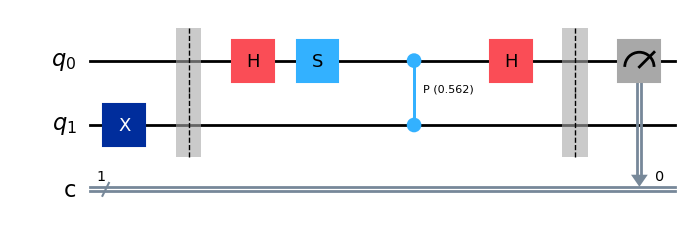

In [57]:
qc2 = im_circuit(angle)
qc2.draw("mpl")

In [58]:
backend = BasicSimulator()

num_of_shots = 10000

re_result = backend.run(qc, shots=num_of_shots).result()   
re_counts = re_result.get_counts()                    

im_result = backend.run(qc2, shots=num_of_shots).result()   
im_counts = im_result.get_counts()                

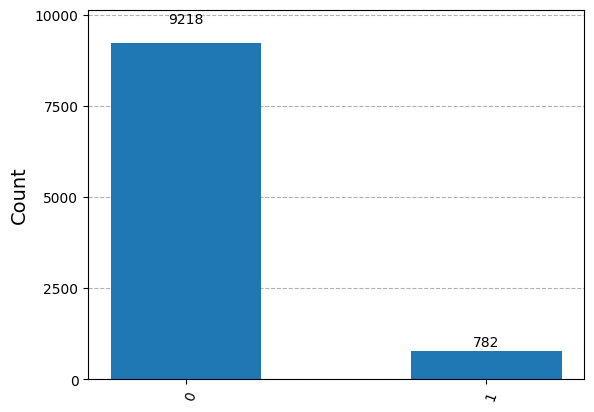

In [59]:
plot_histogram(re_counts)

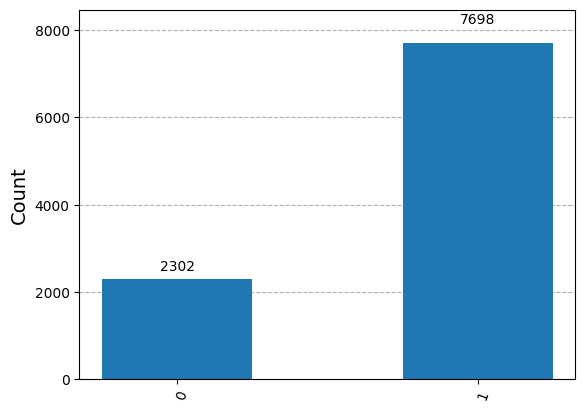

In [60]:
plot_histogram(im_counts)

Say that e^itheta = cos + i sin

show that cos^2 + sin^2 = 1

In [61]:
print('Calculated probability of measuring 1: ', 0.5*(1 - np.cos(angle)))
print('Calculated probability of measuring 0: ',0.5*(1 + np.cos(angle)))
print('Probability of measuring 1', re_counts['1']/num_of_shots)
print('Probability of measuring 0', re_counts['0']/num_of_shots)

Calculated probability of measuring 1:  0.07703775038446603
Calculated probability of measuring 0:  0.922962249615534
Probability of measuring 1 0.0782
Probability of measuring 0 0.9218


3.3 math

(we could just graph sin^2 + cos^2 instead of running a bunch of trials)

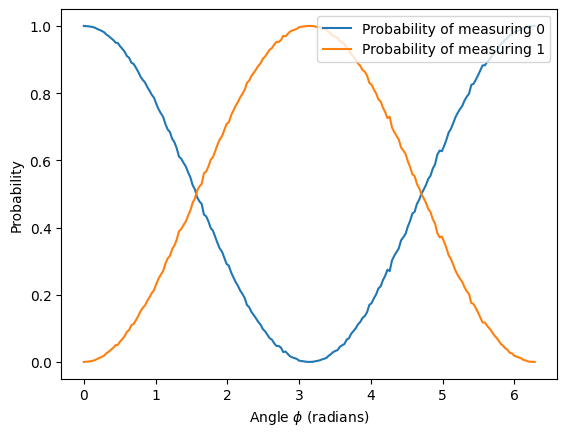

In [62]:
backend = BasicSimulator()

angles = np.linspace(0, 2*pi, 200)
prob0 = []
prob1 = []
expected_phi = angles
for ang in angles:
    circ = re_circuit(ang)
    num_of_shots = int(num_of_shots)
    counts = backend.run(circ, shots=num_of_shots).result().get_counts()
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/num_of_shots)
        prob1.append(counts['1']/num_of_shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/num_of_shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/num_of_shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle $\phi$ (radians)')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

justification of subtracting both the probablities

In [63]:
print("Results of the Trial: ")
print("  Real Circuit:  \t",re_counts)
print("  Imginary Circuit:\t",im_counts)

re_p0 = re_counts['0']/num_of_shots
re_p1 = re_counts['1']/num_of_shots
im_p0 = im_counts['0']/num_of_shots
im_p1 = im_counts['1']/num_of_shots

re = re_p0 - re_p1
#re = 1 - 2*(p1re)
#re = 2*(p0re) - 1

im = im_p1 - im_p0
#im = 2*(p1im) - 1
#im = 1 - 2*(p0im)

ans = np.arctan(im/re)

print("\nWhat we got: ", ans)
print("What we want: ", angle)

Results of the Trial: 
  Real Circuit:  	 {'0': 9218, '1': 782}
  Imginary Circuit:	 {'0': 2302, '1': 7698}

What we got:  0.5690575020241578
What we want:  0.5625


graph explainination

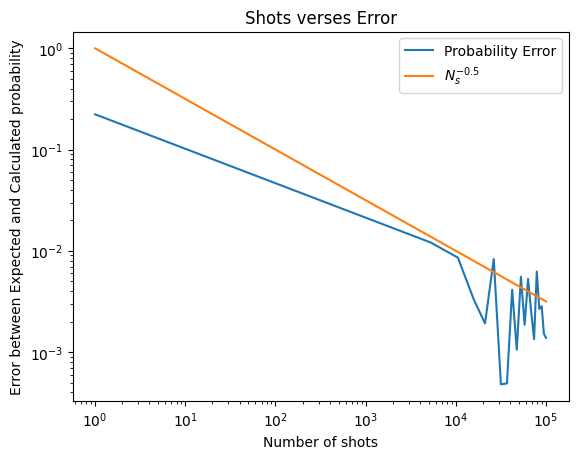

In [64]:
# Construct a graph of error verses number of shots
backend = BasicSimulator()

trials = np.linspace(1, 10**5, 20)
Ns = []
error_diff = []
for num_of_shots in trials:
    # for some reason python doesn't believe this number is an integer
    num_of_shots = int(num_of_shots)
    re_counts = backend.run(qc, shots=num_of_shots).result().get_counts() 
    im_counts = backend.run(qc2, shots=num_of_shots).result().get_counts() 

    re_p0 = re_p1 = im_p0 = im_p1 = 0
    
    if re_counts.get('0') is not None:
        re_p0 = re_counts['0']/num_of_shots
        
    if re_counts.get('1') is not None:
        re_p1 = re_counts['1']/num_of_shots
        
    if im_counts.get('0') is not None:
        im_p0 = im_counts['0']/num_of_shots
        
    if im_counts.get('1') is not None:
        im_p1 = im_counts['1']/num_of_shots

    
    re = re_p0 - re_p1
    im = im_p1 - im_p0
    ans = np.arctan(im/re)
    
    error_diff.append( abs(angle - ans) )
    Ns.append( num_of_shots**(-0.5) )
    
plt.loglog(trials, error_diff, label = 'Probability Error')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated probability")
plt.legend(loc='upper right')
plt.show()